In [1]:
import numpy as np
import matplotlib.pyplot as plt

β = np.array([0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027])
βtot = sum(β)
thalfs = np.array([56, 23, 6.2, 2.3, 0.61, 0.23])/10
λ = np.log(2)/thalfs
Λ = 5e-5
λ

array([ 0.12377628,  0.30136834,  1.11797932,  3.01368339, 11.36306853,
       30.13683394])

In [2]:
def inhour(ω):

    v = np.zeros_like(ω)
    for i in range(6):
        v += β[i]/(ω+λ[i])
    v += Λ
    v *= ω
    return v

In [3]:
-βtot/Λ, λ[1]

(-130.0, 0.3013683393738893)

In [4]:

ω = []
bounds = [-βtot/Λ*1.1] + list(-λ) + [-1e-9, 1e-9, 10]
for i in range(len(bounds)-1):
    print(bounds[i], bounds[i+1])
    ω += list(np.linspace(bounds[i]*1.00001, bounds[i+1]*0.99999, 100000))
ω = np.array(ω)  

-143.0 -0.12377628224284738
-0.12377628224284738 -0.3013683393738893
-0.3013683393738893 -1.1179793234837827
-1.1179793234837827 -3.013683393738893
-3.013683393738893 -11.363068533769596
-11.363068533769596 -30.136833937388925
-30.136833937388925 -1e-09
-1e-09 1e-09
1e-09 10


In [5]:
len(ω)

900000

In [6]:
v = inhour(ω)

import numpy.ma as M

mv = M.masked_where( abs(ω+λ[0])<1e-4, v)
for i in range(1, 6):
    mv = M.masked_where( abs(ω+λ[i])<1e-3, mv)


Text(-195.0, -0.006, '$-\\beta/\\Lambda$')

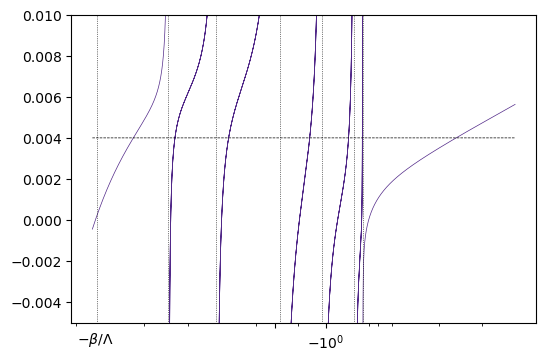

In [13]:
purple = "#512888"

plt.figure(figsize=(6, 4))
plt.plot(ω, mv, lw=0.5, color=purple)
for i in range(6):
    plt.plot([-λ[i], -λ[i]], [-1, 1], 'k:', lw=0.5)
x=-βtot/Λ
plt.plot([x, x], [-1, 1], 'k:', lw=0.5)

plt.plot(ω, 0*ω+0.004, 'k--', lw=0.5)
plt.xscale("asinh")
#plt.xlim(-0.3, 0)
plt.ylim(-0.005, 0.01)


xt = [-βtot/Λ] + list(-λ[::-1])
plt.xticks([ -3.3, -1]);

plt.text(x*1.5, -0.006, r"$-\beta/\Lambda$")